Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что риск убытков посчитан верно.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Добрый день, Артём. Спасибо за разбор проекта! Вопросов после того как исправил уже не осталось)
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!


# Выбор локации для скважины


## Описание проекта

### Цель и задачи работы

Цель исследования: построить модель для определения региона с наибольшей потенциальной прибылью от добычи нефти.

Задачи исследования:
- проанализировать данные о залежах нефти в 3х регионах;
- обучить модель LinearRegression(), оценить RMSE, средний предсказанный объём сырья;
- рассчитать стоимость разработки скважины, минимальный объём сырья для окупаемости;
- разработать функцию для подсчёта прибыли на основании предсказаний модели;
- оценить потенциальную прибыль и риск убытков в каждом регионе методом bootstrap;
- установить наиболее выгодный регион для нефтедобычи.


### Описание данных

Исследование будет проведено на синтетических данных, полученных из открытых источников. Предоставлены следующие признаки:

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

### Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.


## Загрузка и подготовка данных
Планируется оценить характеристики датафрейма, распределение значений, наличие дубликатов и пропусков в данных по каждому региону. 

In [18]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np



<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [19]:
# чтение данных
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

# функция для исследования датасетов

def data_summary(df):
    print(f'Информация по датасету:')
    df.info()
    
    print('\n\n\nПервые 5 строк')
    display(df.head())
    print('\n\n\nСтатистики')
    display(df.describe())
    print('\n\n\nГистограммы')
    df.hist(figsize=[15,7], bins=50)
    plt.show()
    print('\n\n\nКоличество пропусков в данных')
    print(df.isna().sum().sum())
    print('\n\n\nКоличество дубликатов в данных')
    print(df.duplicated().sum())

### Информация о датасетах
#### Регион 0

Информация по датасету:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB



Первые 5 строк


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647





Статистики


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347





Гистограммы


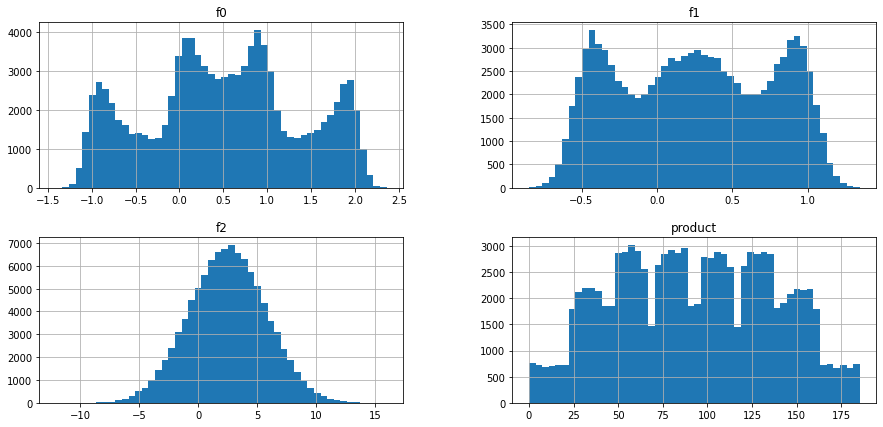




Количество пропусков в данных
0



Количество дубликатов в данных
0


In [20]:

data_summary(data_0)

#### Регион 1

Информация по датасету:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB



Первые 5 строк


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305





Статистики


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408





Гистограммы


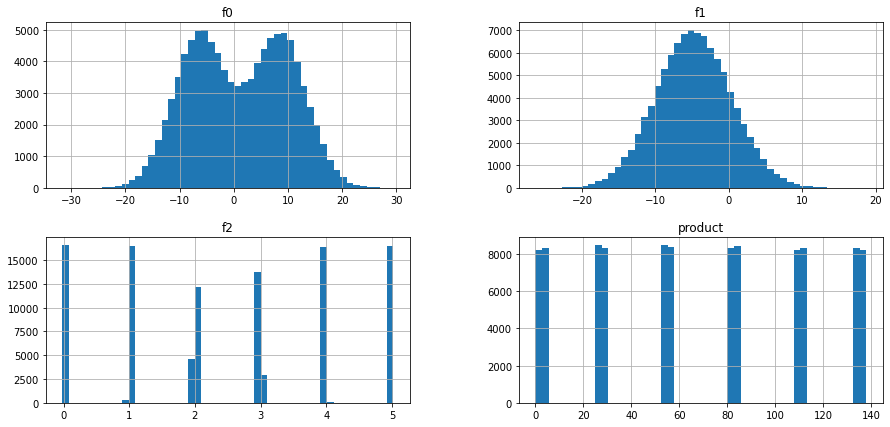




Количество пропусков в данных
0



Количество дубликатов в данных
0


In [21]:
data_summary(data_1)

#### Регион 2

Информация по датасету:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB



Первые 5 строк


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746





Статистики


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838





Гистограммы


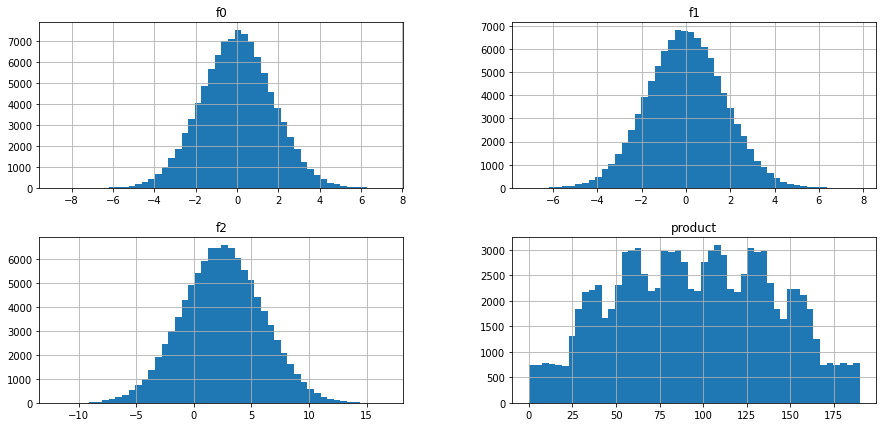




Количество пропусков в данных
0



Количество дубликатов в данных
0


In [22]:
data_summary(data_2)

Данные по каждому из регионов не содержат грубых выбросов, пропусков и дубликатов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения были визуализированы!
</div>

## Обучение и проверка модели
### Функция для обучения, валидации, расчёта RMSE модели и среднего объёма сырья

In [23]:
scaler=StandardScaler()
def train_valid_mean(df):
    features = df.drop(['id','product'], axis=1) # выделяем признаки
    
    target = df['product'] # выделяем целевой признак
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=13) # разбиваем на обучающую 
                                                           # и валидационную выборки
    features_train = scaler.fit_transform(features_train) # обучаем скейлер, масштабируем обучающие признаки
    features_valid = scaler.transform(features_valid)     # масштабируем валидационные признаки
    model=LinearRegression()
    model.fit(features_train, target_train) # обучение модели
    predictions = model.predict(features_valid) # запись предсказаний в переменную
    print('RMSE модели:', mean_squared_error(target_valid, predictions)**0.5) # отображение RMSE
    print('Средний запас сырья:', target.mean()) # отображение среднего запаса сырья
    print('Предсказанный средний запас сырья:', predictions.mean()) # отображение предсказанного среднего
    
    return model, predictions, target_valid  # сохраняем модель, предсказания модели и правильные ответы на 
                                             # валидационной выборке согласно условию задачи.

### Применение функции

In [24]:
print('Регион 0')
model_0, predictions_0, target_valid_0 = train_valid_mean(data_0)

Регион 0
RMSE модели: 37.69454735409069
Средний запас сырья: 92.50000000000001
Предсказанный средний запас сырья: 92.59431986205762


In [25]:
print('Регион 1')
model_1, predictions_1, target_valid_1 = train_valid_mean(data_1)

Регион 1
RMSE модели: 0.8937965421900188
Средний запас сырья: 68.82500000000002
Предсказанный средний запас сырья: 69.02949151591963


In [26]:
print('Регион 2')
model_2, predictions_2, target_valid_2 = train_valid_mean(data_2)

Регион 2
RMSE модели: 40.021834799355375
Средний запас сырья: 95.00000000000004
Предсказанный средний запас сырья: 94.95620175786401


Модель LinearRegression показала наименьшее RMSE для региона 1 (0.9), в то время как в прочих регионах этот показатель очень велик. Согласно гистограммам, полученным при исследовании данных, в регионе 1 отмечено более равномерное распределение значений целевого признака, с чем может быть связана эта особенность. Рассмотрим диаграммы boxplot для показателя product в каждом из регионов. 

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Перед обучением линейных моделей нужно нормализовать признаки, при этом scaler должен быть обучен только на треине.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Исправлено в пунктах 3.1, а также 5.1.2. Спасибо!
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично!
</div>

### Диаграммы размаха значений product по регионам

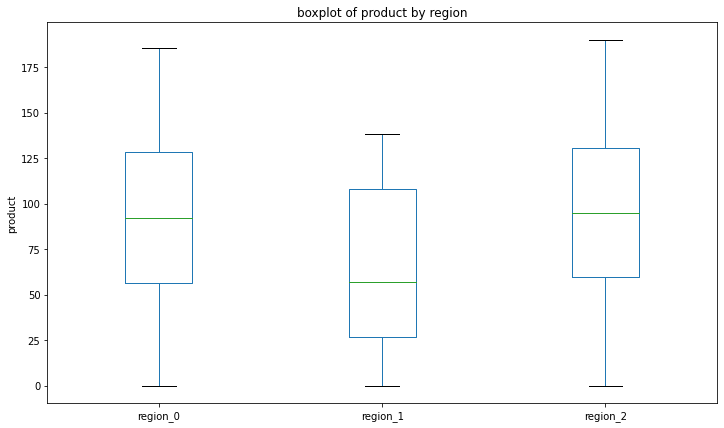

In [27]:
boxplot_df = pd.DataFrame(data={'region_0': data_0['product'],
                                'region_1': data_1['product'],
                                'region_2': data_2['product']})
boxplot_df.plot(kind='box', figsize=[12,7], title='boxplot of product by region', ylabel='product');

Диаграмма подтверждает: в регионе 1 относительно меньший размах значений целевого признака, что и могло способствовать более успешной работе модели.

## Подготовка к расчёту прибыли
Согласно информации заказчика, при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей. Доход с каждой единицы продукта составляет 450 тыс. рублей.

In [28]:
REGION_BUDGET = 10000000000 # бюджет на регион
PRODUCT_UNIT_INCOME = 450000 # прибыль с продажи 1 единицы продукта
N_SURVEYED = 500 # количество исследованных точек
N_DEVELOPED = 200 # количество выбранных для разработки скважин
WELL_COST = REGION_BUDGET/N_DEVELOPED # стоимость разработки скважины
MIN_ACCEPTABLE_PRODUCT = WELL_COST/PRODUCT_UNIT_INCOME # объём сырья для безубыточной разработки новой скважины.
print('Объём сырья, необходимый для окупаемости скважины:', MIN_ACCEPTABLE_PRODUCT)

Объём сырья, необходимый для окупаемости скважины: 111.11111111111111


Таким образом, требуемый для покрытия расходов на разработку скважины объём сырья превышает среднее значение в каждом из регионов. Наибольший средний запас сырья наблюдается в регионе 2, где он составляет 95 тыс. баррелей.


<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента: </b> Спасибо! исправил.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

## Расчёт прибыли и рисков 

Расчёт для каждого региона будет выполнен в соответствии с требованиями заказчика. Сэмплы должны содержать 500 локаций (n_surveyed), из которых необходимо отобрать 200 наиболее прибыльных (n_developed) на основании предсказанного объёма сырья. 

Далее прибыль будет рассчитана на основе суммарного объёма сырья в выбранных скважинах и стоимости единицы продукта (product_unit_income).

В рамках процедуры bootstrap для каждого региона будет создана 1000 сэмплов с дальнейшим расчётом средней прибыли, доверительного интервала 95% и риска убытков, т. е. вероятности того, что прибыль окажется меньше, чем region_budget - 10 млрд рублей.

### Объявление функций
#### Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [29]:
def calculate_income(model, df, num_selected=N_DEVELOPED): # на вход функция получает модель, набор данных
                                                           # и количество скважин, которые следует выбрать
    
    features = df.drop(['id','product'], axis=1) # отбираем фичи, по которым модель будет предсказывать
    df_edited = df.copy() # создаем новый датафрейм, чтобы не менять исходный
    df_edited['prediction'] = model.predict(features) # добавляем в датафрейм столбец с предсказаниями
    df_edited = df_edited.sort_values(by='prediction', ascending=False).head(num_selected) # выбираем строки датафрейма с 
                                                                                           # наиболее высоким prediction
    return df_edited['product'].sum()*PRODUCT_UNIT_INCOME - REGION_BUDGET  # возвращаем суммарное количество продукта, 
                                                          # помноженное на стоимость единицы продукта минус бюджет на регион
                                                          # чтобы получить прибыль

<div class="alert alert-block alert-success">
<b>Успех:</b> Верно.
</div>

#### Функция для выполнения процедуры bootstrap

In [30]:
state = np.random.RandomState(13) # потребуется генератор псевдослучайных чисел

In [31]:
# Объявляем функцию для выполнения процедуры bootstrap
# на вход функция получает датафрейм
def bootstrap_income(df):
    
    incomes = [] # пустой список для фиксации полученных значений прибыли
    model = LinearRegression() # модель линейной регрессии обучаем на всем датасете
    model.fit(scaler.fit_transform(df.drop(['id','product'], axis=1)), df['product']) # масштабируем трейн и обучаем модель
    for i in range(1000): # 1000 итераций цикла
        sample = df.sample(n=N_SURVEYED, replace=True, random_state=state) # формируем bootstrap-выборку
        incomes.append(calculate_income(model, sample)) # передаем модель и выборку в функцию, 
                                                        # рассчитывающую прибыль
    
    incomes=pd.Series(incomes) 
    incomes.hist(bins=100, figsize=[12,5]) # построим гистограмму полученного распределения прибыли
    plt.show()
    print('Средняя прибыль:',incomes.mean()) 
    lower = incomes.quantile(0.025) 
    upper = incomes.quantile(0.975)
    print('Доверительный интервал 95%: от', lower, 'до', upper)
    failed = incomes < 0 # Создадим Series булевых значений, где True означает убыток
    print('Риск убытков:', failed.mean())

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Риск найден очень элегантно.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Среднее и интервал нужно было посчитать на прибыль, а не на выручку.
</div>



<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Исправлено! спасибо)
    
    см пункт 5.1.1 - из выручки по региону теперь вычтен бюджет региона, чтоб рассчитать прибыль 
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Верно, молодец!
</div>

### Расчёт прибыли
#### Регион 0

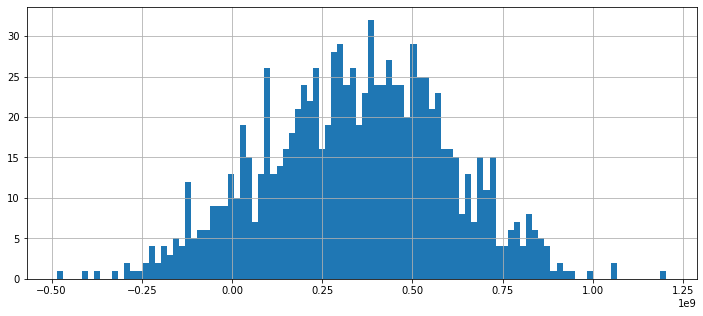

Средняя прибыль: 344436225.84999317
Доверительный интервал 95%: от -152873905.28862557 до 827911268.482997
Риск убытков: 0.098


In [35]:
bootstrap_income(data_0)


#### Регион 1

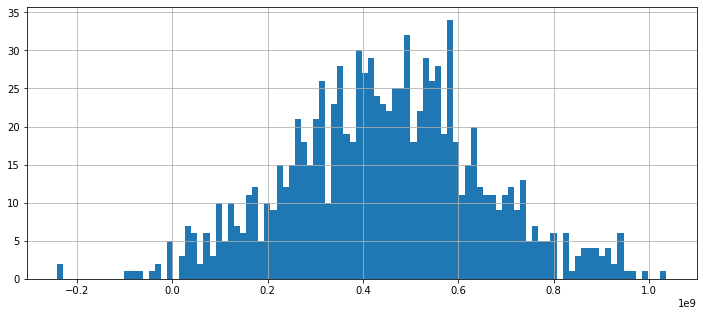

Средняя прибыль: 447387013.41188776
Доверительный интервал 95%: от 43141154.396469735 до 877197377.0508367
Риск убытков: 0.013


In [33]:
bootstrap_income(data_1)

#### Регион 2

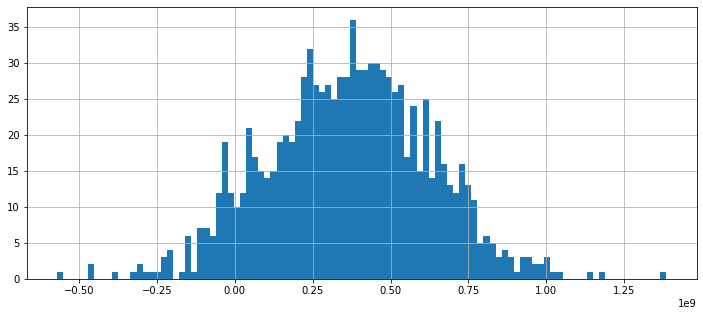

Средняя прибыль: 364577300.79463387
Доверительный интервал 95%: от -119753772.46357429 до 858772541.6113269
Риск убытков: 0.089


In [34]:
bootstrap_income(data_2)

#### Итог
Согласно требованиям заказчика, перспективными признают регионы с вероятностью убытков менее 2.5%, среди которых затем отбирают регион с наибольшей потенциальной прибылью. В рамках данного исследования требованиям удовлетворяет лишь регион 1 с риском убытков 1.3%.

## Выводы
### Цель и задачи работы

Цель исследования: построить модель для определения региона с наибольшей потенциальной прибылью от добычи нефти.

Задачи исследования:
- проанализировать данные о залежах нефти в 3х регионах;
- обучить модель LinearRegression(), оценить RMSE, средний предсказанный объём сырья;
- рассчитать стоимость разработки скважины, минимальный объём сырья для окупаемости;
- разработать функцию для подсчёта прибыли на основании предсказаний модели;
- оценить потенциальную прибыль и риск убытков в каждом регионе методом bootstrap;
- установить наиболее выгодный регион для нефтедобычи.

### Материалы и методы
Исследование выполнено средствами Python, библиотек pandas, sklearn, numpy. Визуализация данных осуществлялась средствами matplotlib. Исследование проводилось на синтетических данных, полученных из открытых источников.

### Ход исследования
В ходе работы выполнено следующее:
- загружены и исследованы 3 датасета
- на каждом из них обучена модель линейной регрессии, рассчитана RMSE.
- рассчитаны средний объем сырья и средний предсказанный объем.
- построены диаграммы размаха значений product по регионам.
- рассчитана стоимость постройки скважины, определен минимальный объем сырья, необходимый для окупаемости.
- методом bootstrap на 1000 выборок рассчитана средняя прибыль, 95% доверительный интервал, вероятность убытка для каждого региона.
- выбран регион, удовлетворяющий требованиям заказчика.

### Результаты исследования
- Регион 0

Средняя прибыль: 344 млн. руб.

Доверительный интервал 95%: от -153 млн. руб. до 827 млн. руб.

Риск убытков: 9.8%

- Регион 1

Средняя прибыль: 447 млн. руб.

Доверительный интервал 95%: от 43 млн. руб. до 877 млн. руб.

Риск убытков: 1.3%

- Регион 2

Средняя прибыль: 365 млн. руб.

Доверительный интервал 95%: от -119 млн. руб. до 858 млн. руб.

Риск убытков: 8.9%

### Рекомендации

Регион 1 удовлетворяет требованиям заказчика в связи с риском убытков менее 2,5%. Рекомендуется рассмотреть возможность добычи нефти в данном регионе.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть подробный вывод в конце проекта! С выбором региона согласен.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован